In [26]:
import pandas as pd
info_filename1 = r"E:\pycharm files\housing_pricing_model\data\jw.csv"
info_filename2 = r"E:\pycharm files\housing_pricing_model\data\clean_data.csv"
df_jw = pd.read_csv(info_filename1)
df_data = pd.read_csv(info_filename2,encoding="gbk")

In [27]:
df_price = df_data.loc[:,["单价"]]

In [28]:
df_combine = pd.concat([df_price,df_jw],axis=1)




In [29]:
'''
标准化数据
'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler()


df_scaled = pd.DataFrame(scaler.fit_transform(df_combine), columns=df_combine.columns)
scaler1.fit_transform(df_combine.loc[:,["单价"]])

df_scaled = df_scaled*0.98+0.01

In [30]:
y = df_scaled.iloc[:,0].to_numpy().reshape(-1,1)
X = df_scaled.iloc[:,1:3].to_numpy()
print(f"y_size:{y.shape}，tpye:{type(y)}")
print(f"X_size:{X.shape}，tpye:{type(X)}")

y_size:(2975, 1)，tpye:<class 'numpy.ndarray'>
X_size:(2975, 2)，tpye:<class 'numpy.ndarray'>


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [43]:
import 机器学习.util.ANN as ANN

ann = ANN.ANN(layer_number=3,
              layer_neuron=[2,20,1],
              learning_rate=0.5,
              batch_size=10,
              epochs=200)

ann_param = ann.fit(X_train,y_train)
print(f"loss={ann_param[2]}")

第5000次迭代 loss=2.1956704721774996
第10000次迭代 loss=4.049199491921128
第15000次迭代 loss=3.835449662539102
第20000次迭代 loss=4.229139750754229
第25000次迭代 loss=2.31941314657453
第30000次迭代 loss=8.349572409953222
第35000次迭代 loss=3.378159798552744
第40000次迭代 loss=4.494965303907469
第45000次迭代 loss=3.200892868548945
loss=997.3559173986903


In [44]:
y_hat = ann.transform(X_test)
y_test1 = (y_test-0.01)/0.98
y_hat1 = (y_hat-0.01)/0.98
df_ytest = scaler1.inverse_transform(y_test1)
df_yhat = scaler1.inverse_transform(y_hat1)

y_error = abs(df_ytest - df_yhat)
idx = y_error>2000
print(f'错误率：{idx.sum()/len(y_test)}')
# yy = pd.DataFrame([y_hat,y_test])

错误率：0.6941176470588235


<AxesSubplot:xlabel='经度', ylabel='纬度'>

D:\Anaconda3_2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3_2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3_2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3_2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3_2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3_2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32428 missing from current font.
  font.set_text(s, 0, flags=flags)


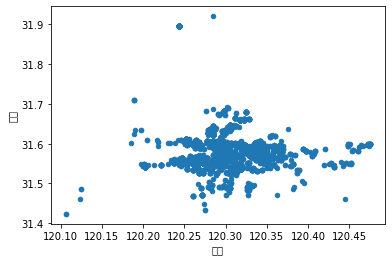

In [34]:
df_jw.plot.scatter(x="经度",y="纬度")

样本0的K个最近邻索引： [ 961 2159  692]
0.24811669697109853


TypeError: inverse_transform() missing 1 required positional argument: 'X'